# Modelagem, Simulação e Implementação de Sistemas
### Lista V - Análise Transitória
Guilherme Brandão da Silva

In [2]:
% Carrega módulos para operações simbólicas e operações em frequência
pkg load control
pkg load symbolic
pkg load signal

In [3]:
% Function para Plotar a Inversa de Laplace (Simbólica)
function plot_ilap(f, l)
    p = ezplot(f);
    axis(l);
    set(p,'linewidth', 1, 'color', 'k');
end;

### Exercício 1: Realize a análise do seguinte sistema:
![](e1.png)


Transfer function 'Festimado' from input 'u1' to output ...

             2       
 y1:  ---------------
      s^2 + 0.7 s + 2

Continuous-time model.
yfinal =  1.0018
ysettle =  0.51799
settling_ind =  45
ans =

  scalar structure containing the fields:

    RiseTime =  0.77692
    SettlingTime =  20
    SettlingMin =  0.80628
    SettlingMax =  1.4432
    Overshoot =  0.44059
    Undershoot =  0.19518
    Peak =  1.4432
    PeakTime =  2.4000


Transfer function 'F' from input 'u1' to output ...

             5 s + 5       
 y1:  ---------------------
      s^3 + 4 s^2 + 5 s + 7

Continuous-time model.
yfinal =  0.71462
ysettle =  0.017251
settling_ind =  92
ans =

  scalar structure containing the fields:

    RiseTime =  0.68287
    SettlingTime =  20
    SettlingMin =  0.51327
    SettlingMax =  1.2443
    Overshoot =  0.74125
    Undershoot =  0.28176
    Peak =  1.2443
    PeakTime =  1.6162



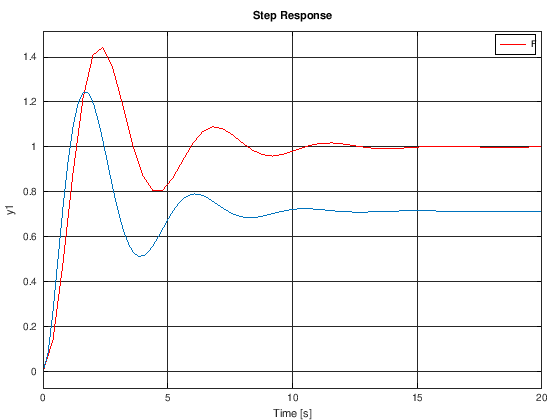

In [4]:
% Estimando os Parâmetros:
Festimado = tf(2, [1 0.7 2])

% Resposta ao Degrau
step(Festimado, 'r')
stepinfo(Festimado)

hold on;

% Montnado a Função de Transferência Exata
G1 = 5;
G2 = tf(1,[1 2]);
G3 = tf(1, [1 1]);
H1 = tf(1,[1 1]);

F = feedback(G1*G2*G3, H1)

% Resposta ao Degrau
step(F)
stepinfo(F)

### Exercício 2: Realize a análise do seguinte sistema:
![](e2.png)


Transfer function 'F1' from input 'u1' to output ...

                   1e-06              
 y1:  --------------------------------
      0.0018 s^2 + 0.02207 s + 0.02306

Continuous-time model.

Transfer function 'F2' from input 'u1' to output ...

                          1e-06                    
 y1:  ---------------------------------------------
      0.0018 s^3 + 0.02207 s^2 + 0.023 s + 5.65e-05

Continuous-time model.
yfinal =  0.000043216
ysettle =  0.000041920
settling_ind =  1
ans =

  scalar structure containing the fields:

    RiseTime =  1.9389
    SettlingTime =  5
    SettlingMin =  0.000039040
    SettlingMax =  0.000043216
    Overshoot = 0
    Undershoot = 0
    Peak =  0.000043216
    PeakTime =  5

yfinal =  0.017688
ysettle =  0.017157
settling_ind =  1
ans =

  scalar structure containing the fields:

    RiseTime =  890.64
    SettlingTime =  3000
    SettlingMin =  0.015922
    SettlingMax =  0.017688
    Overshoot = 0
    Undershoot = 0
    Peak =  0.017688


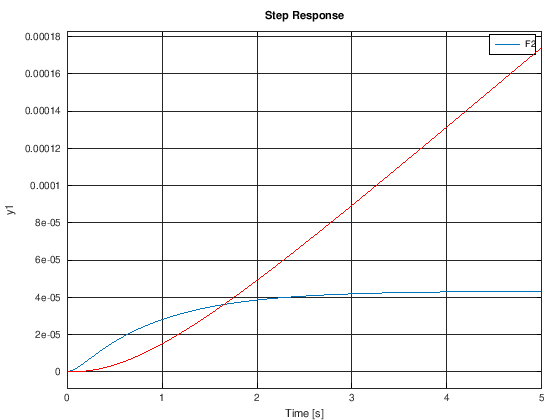

In [11]:
% Montnado a Função de Transferência Exata
G1 = tf(1,[0.18 2]);
G2 = 0.000001;
G3 = tf(1, [0.01 0.0115]);
G4 = tf(1, [1 0]);
H1 = 56.5;

F1 = feedback(G1*G2*G3, H1)
F2 = feedback(G1*G2*G3*G4, H1)

% Resposta ao Degrau
figure(1)
step(F1, 5)
stepinfo(F1)
hold on;
step(F2, 5, 'r')
stepinfo(F2)